#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler


#### Reading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\heman\Downloads\rideshare_kaggle.csv\rideshare_kaggle.csv")
print(df.shape)
df.head()

(693071, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [4]:
# droppping all date and time columns and dropping id columns as its aunique udentifier column
df.drop(['id'],inplace=True,axis=1)
df.shape

(693071, 56)

#### Checking for null values

In [5]:
df.isnull().mean()*100

timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000
windGust                       0.000000


### Missing value imputation

In [13]:
df['price'] = df['price'].fillna(df.price.mean())
df.price.isnull().sum()

0

#### Fetching all the categorical columns

In [14]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
df[categorical_cols].head()

,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


#### Fetching all numerical columns

In [15]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numerical_cols].head()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,26.0,0.44,1.0,42.2148,-71.033,34.38,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,9.0,0.44,1.0,42.2148,-71.033,37.44,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Bivariate Analysis

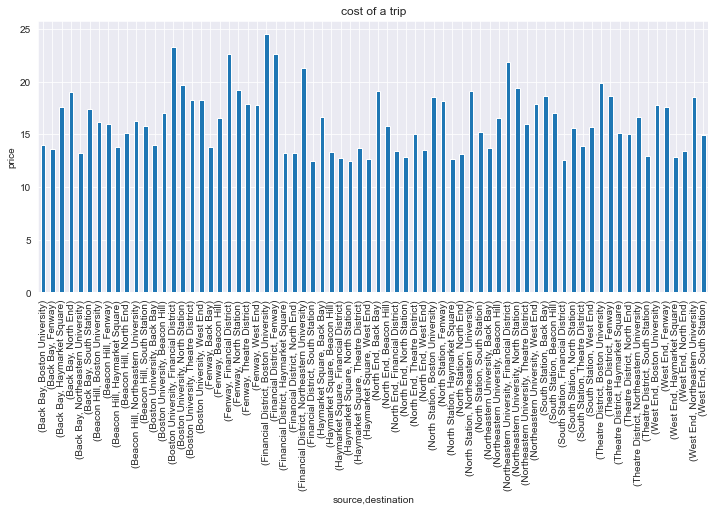

In [10]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
df.groupby(['source','destination'])['price'].mean().plot.bar()
plt.ylabel('price')
plt.title('cost of a trip')
plt.show()

#### Most of the rides cost  around 10 to 20 dollors 

Text(0.5, 1.0, 'Cost of Cab_type')

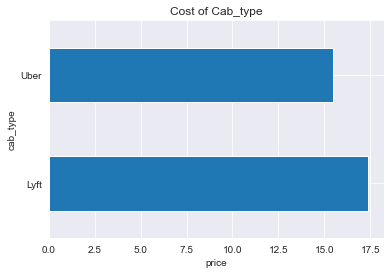

In [11]:
df.groupby('cab_type')['price'].mean().plot.barh()
plt.xlabel('price')
plt.title('Cost of Cab_type')

#### It seems that Lyft costs more when compared to ubber vehicles

### Categorical columns Treatment

In [12]:
for feature in categorical_cols:
    print(f'{feature} = {df[feature].value_counts().count()}')

source = 12
destination = 12
cab_type = 2
product_id = 13
name = 13
short_summary = 9
long_summary = 11
icon = 7


In [13]:
df['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [14]:
# Since both souce and destination are same so we ca drop one
df.drop('destination',inplace=True,axis=1)
df.shape

(693071, 49)

In [15]:
for feature in ['product_id','name','short_summary','long_summary','source','icon']:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [16]:
# cab type has 2 columns so one hot encoding is performed
dummy = pd.get_dummies(df['cab_type'],prefix='cab_type')
df.drop('cab_type',inplace=True,axis=1)
df = pd.concat([df,dummy],axis=1)
df.head()

,source,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cab_type_Lyft,cab_type_Uber
0,5,8,7,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,...,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,1,0
1,5,12,2,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,...,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,0
2,5,7,5,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,...,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,1,0
3,5,10,4,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,...,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,1,0
4,5,11,6,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,...,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,1,0


### Numerical Columns Treatment

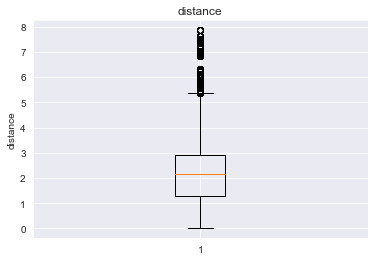

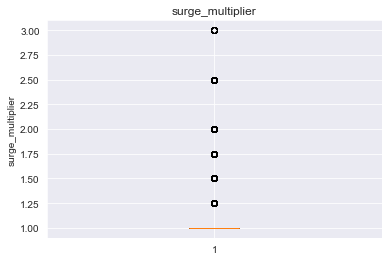

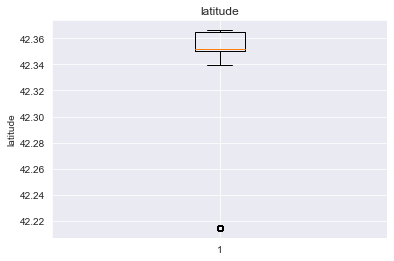

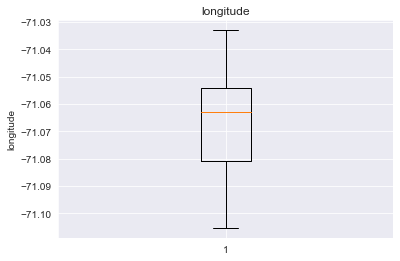

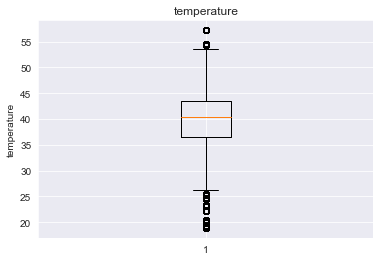

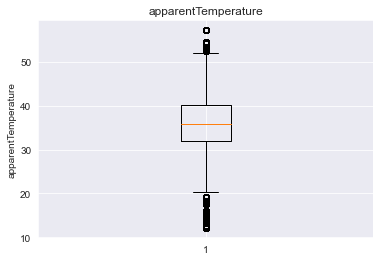

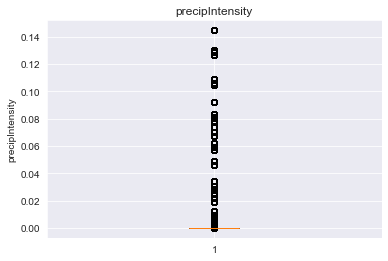

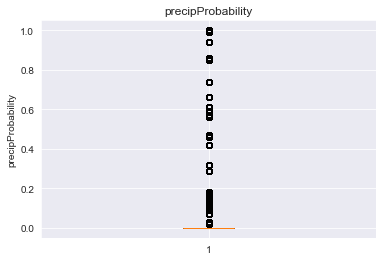

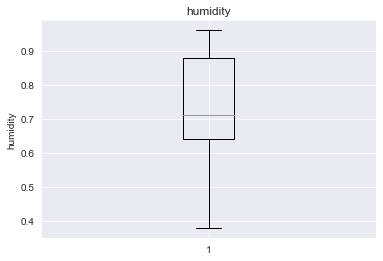

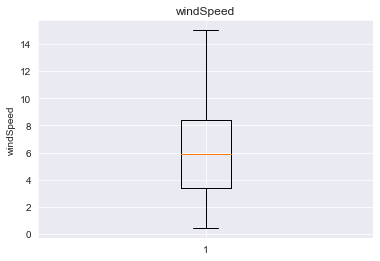

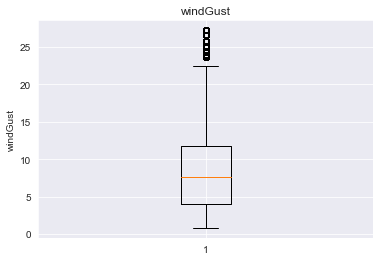

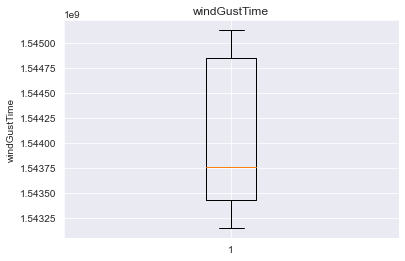

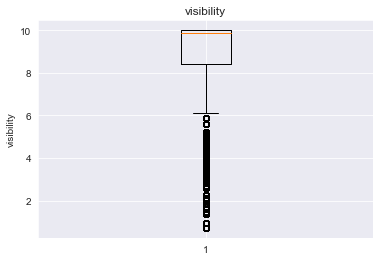

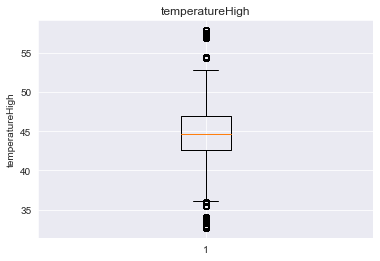

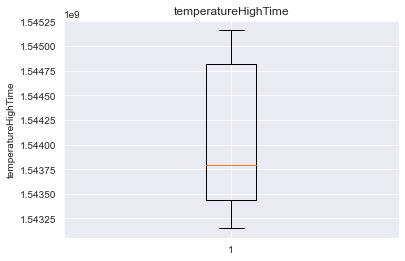

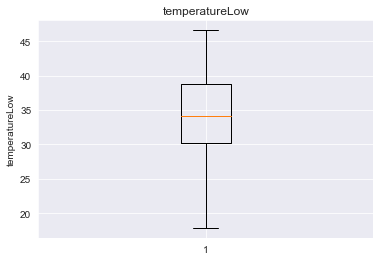

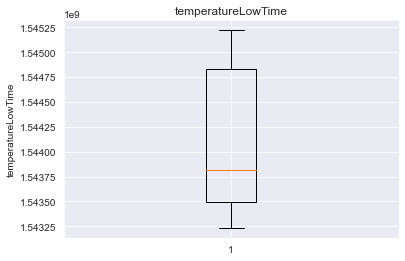

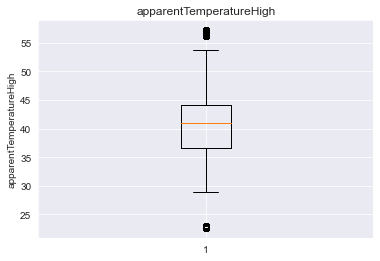

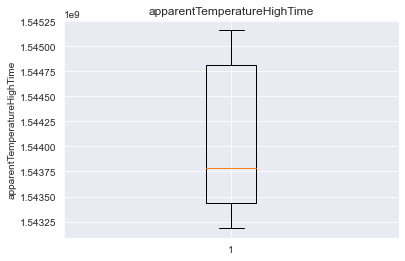

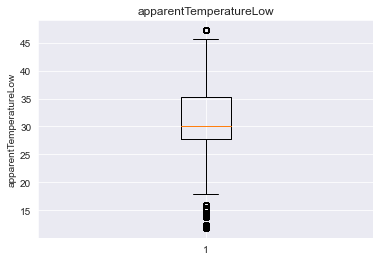

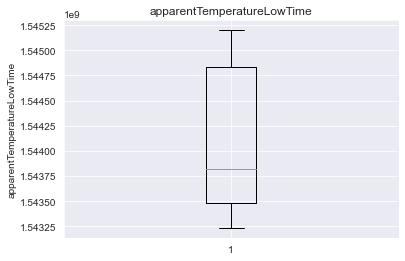

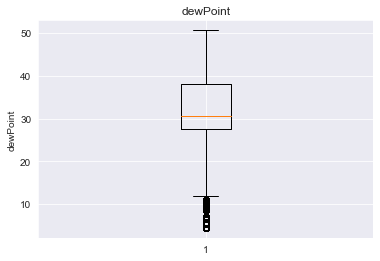

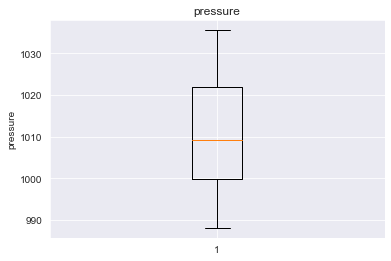

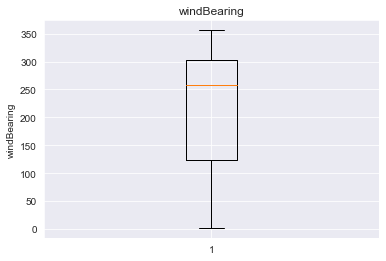

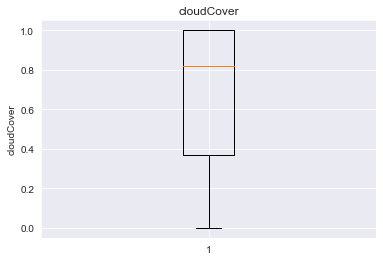

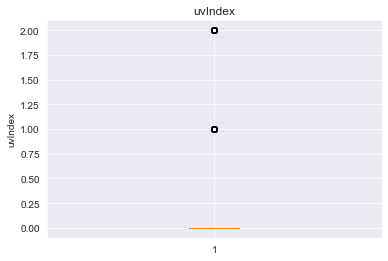

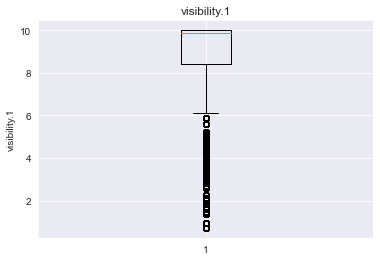

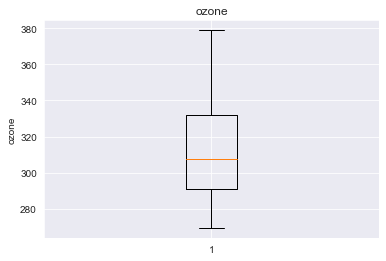

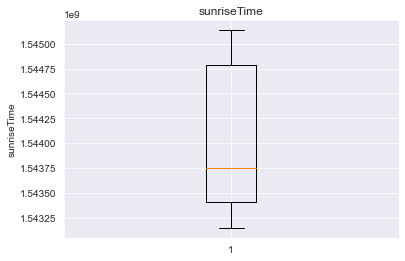

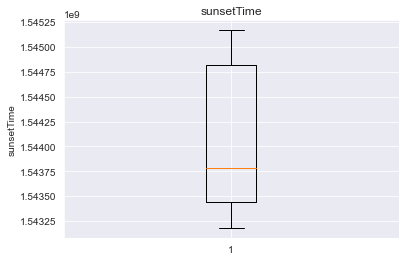

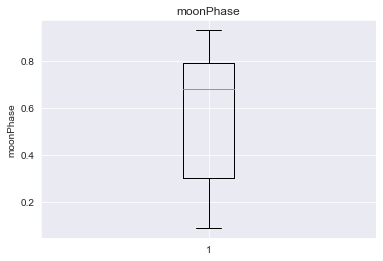

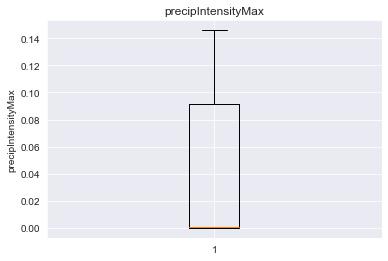

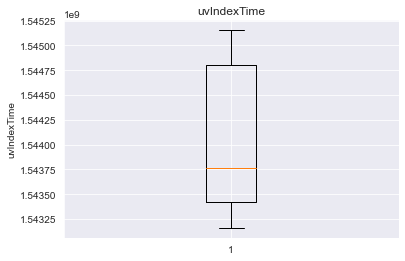

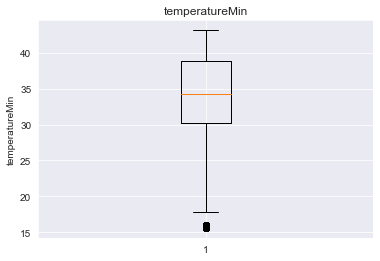

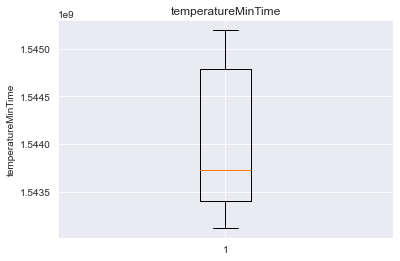

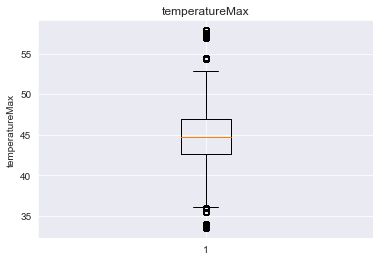

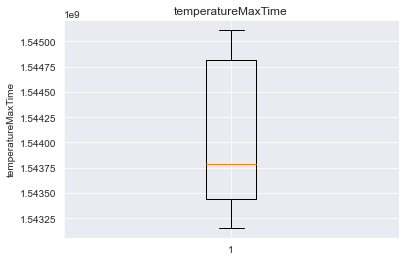

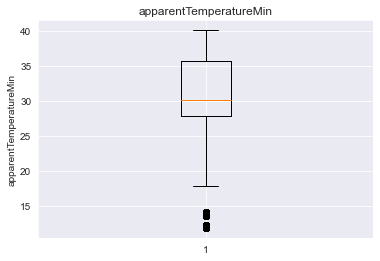

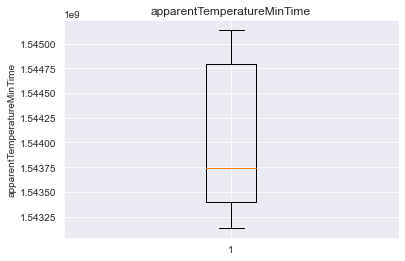

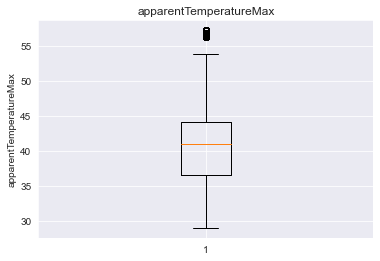

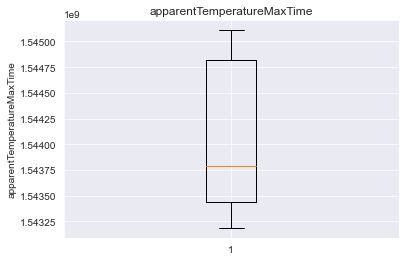

In [17]:
# checking outliers
for feature in numerical_cols:
    plt.boxplot(x=df[feature])
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

In [18]:
df['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [19]:
df['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [20]:
# longitude

In [21]:
df['precipIntensity'].describe()
# preciProbability

count    693071.000000
mean          0.008922
std           0.026901
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.144700
Name: precipIntensity, dtype: float64

### Checking number of outliers

In [22]:
outlier_cols = []
for feature in numerical_cols:
    count=0
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower = df[feature].quantile(0.25) - (1.5*IQR)
    higher = df[feature].quantile(0.75) + (1.5*IQR)
    l = df[feature][df[feature] < lower].count()
    h = df[feature][df[feature] > higher].count()
    if l >1 or h >1:
        outlier_cols.append(feature)
        print(l+h , feature)

8662 distance
20975 surge_multiplier
88546 latitude
36659 temperature
53507 apparentTemperature
150828 precipIntensity
150828 precipProbability
16848 windGust
136839 visibility
163878 temperatureHigh
71604 apparentTemperatureHigh
87672 apparentTemperatureLow
37283 dewPoint
159407 uvIndex
136839 visibility.1
4447 temperatureMin
137046 temperatureMax
76050 apparentTemperatureMin
44772 apparentTemperatureMax


## Outliers imputation

In [23]:
for feature in outlier_cols:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_range = df[feature].quantile(0.25) - (1.5*IQR)
    higher_range = df[feature].quantile(0.75) + (1.5*IQR)
    lower = df[feature].quantile(0.25)
    higher = df[feature].quantile(0.75)
    outlier_treated = np.where(df[feature] > higher_range, higher,df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    outlier_treated = np.where(df[feature] < lower_range , lower, df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    

## Outlier treatment Verification

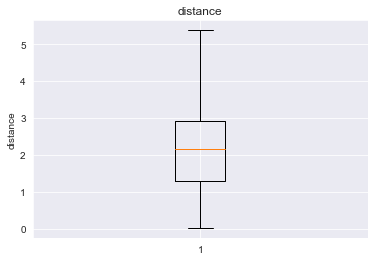

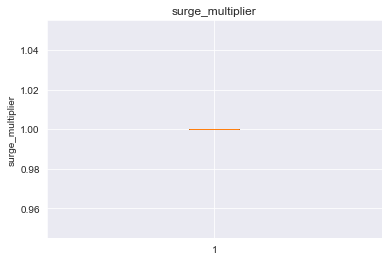

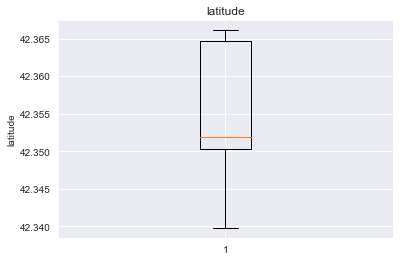

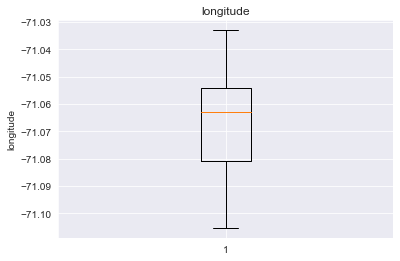

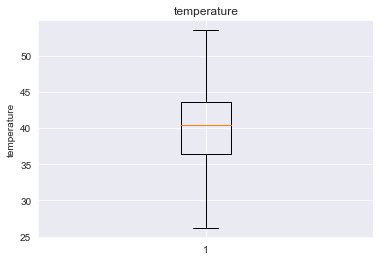

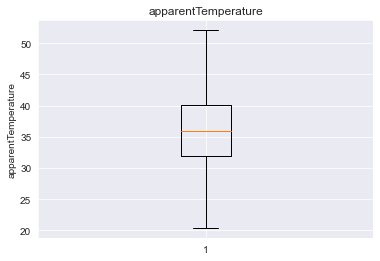

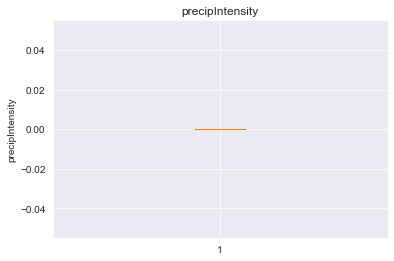

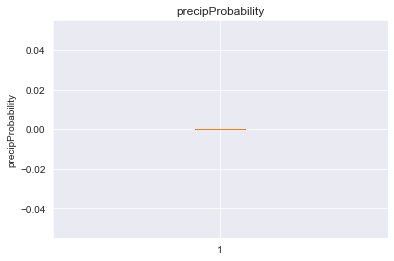

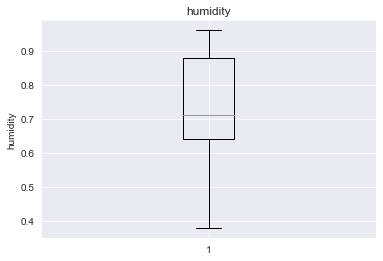

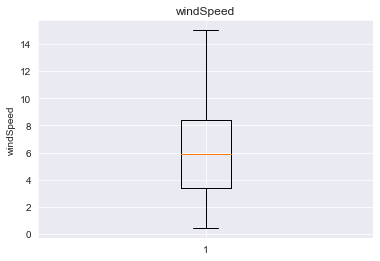

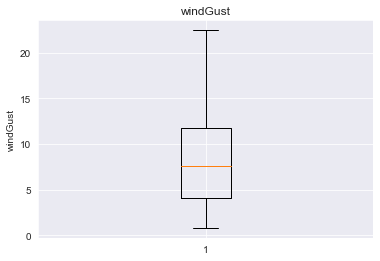

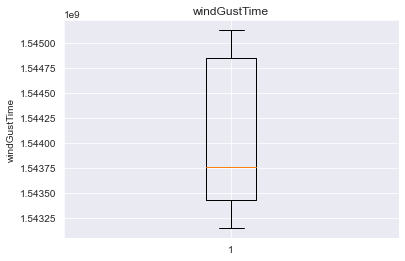

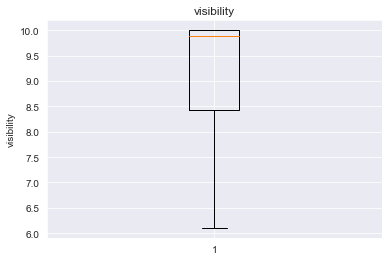

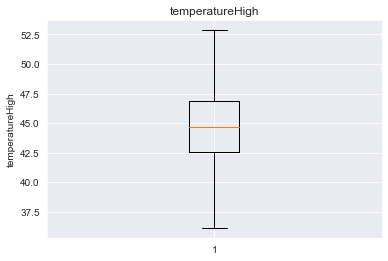

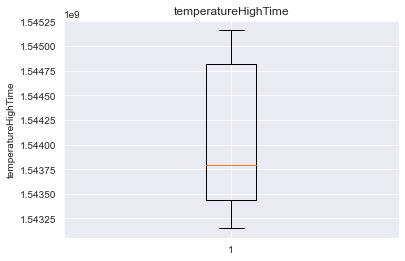

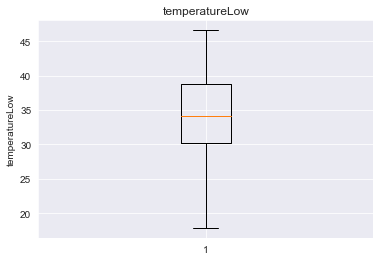

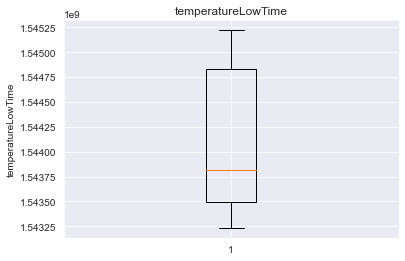

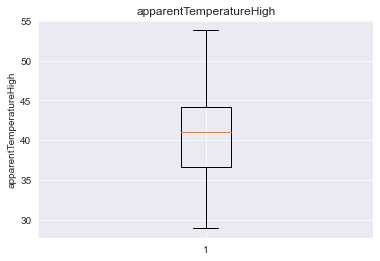

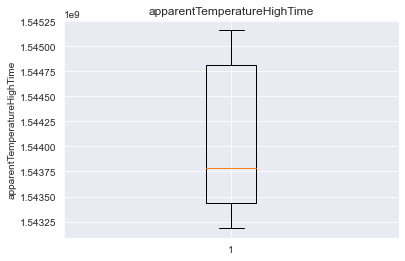

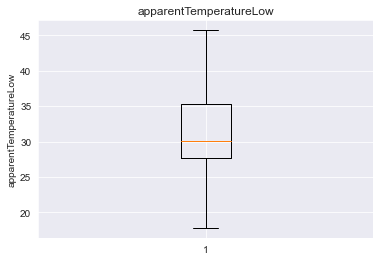

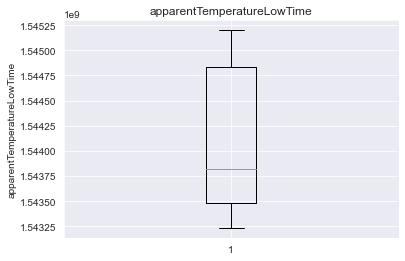

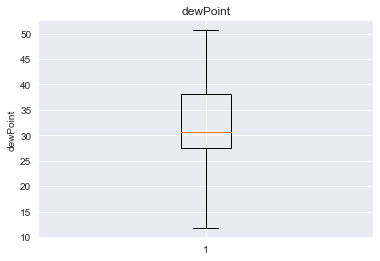

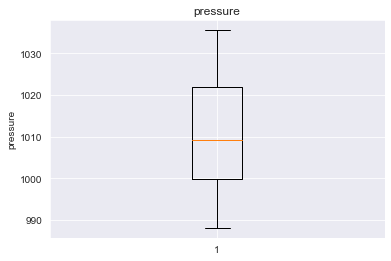

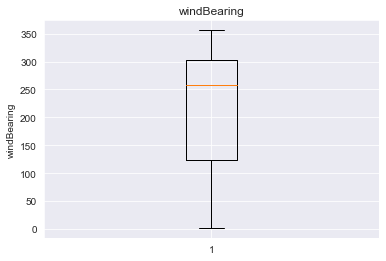

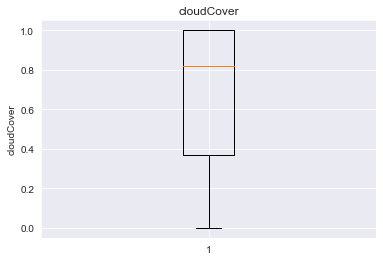

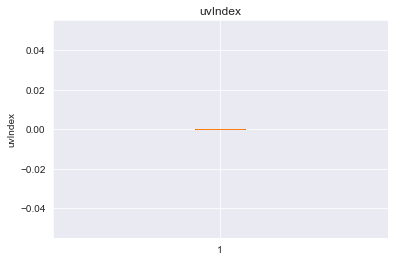

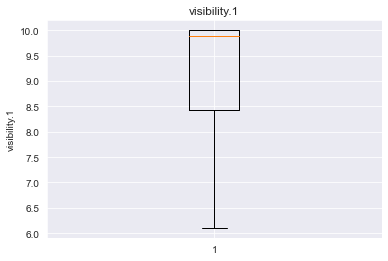

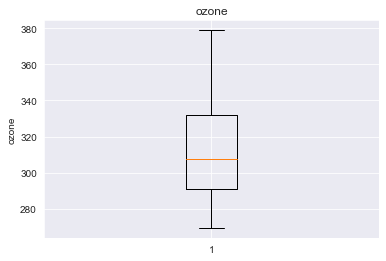

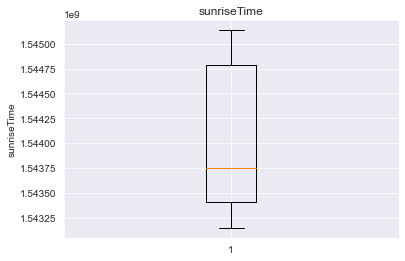

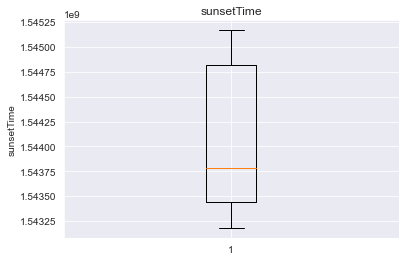

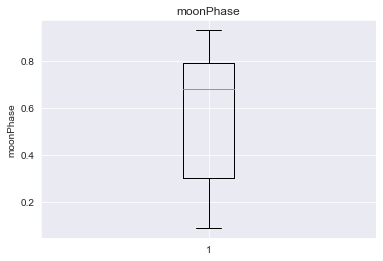

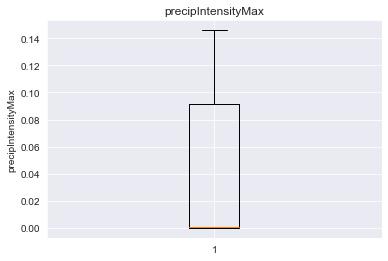

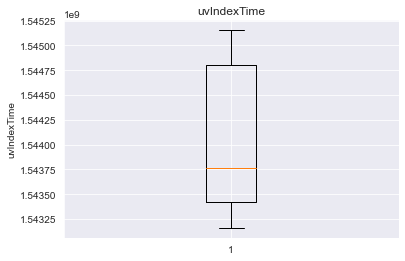

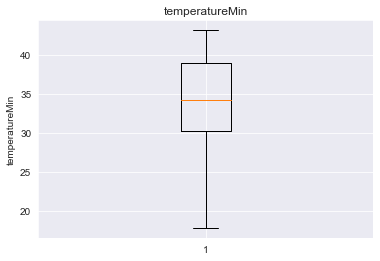

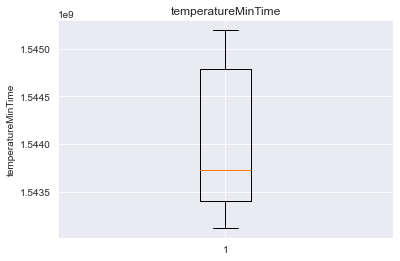

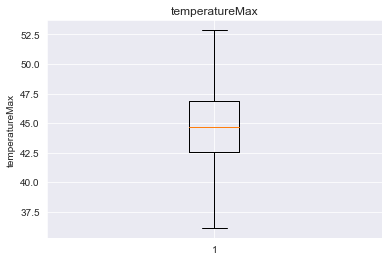

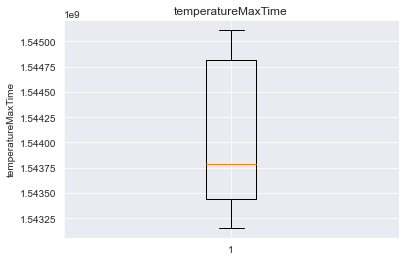

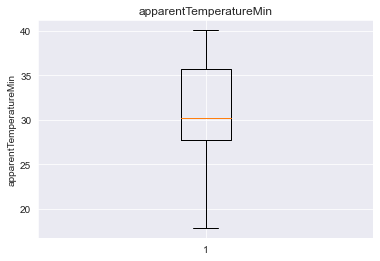

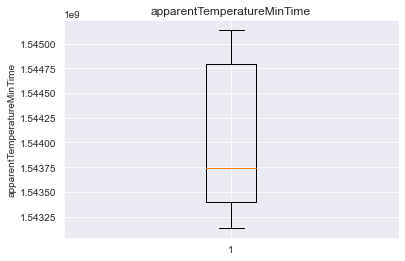

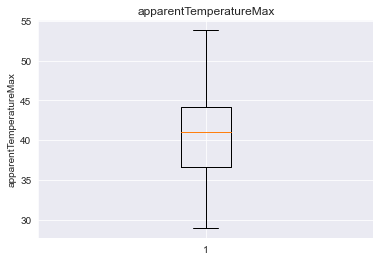

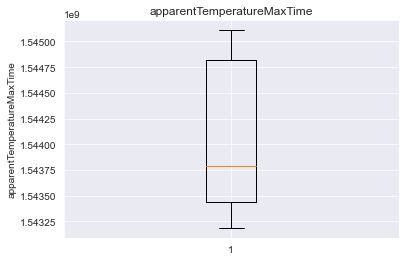

In [24]:
for feature in numerical_cols:
    plt.boxplot(x=df[feature])
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

In [25]:
df['surge_multiplier'].unique()

array([1.])

In [26]:
df['precipIntensity'].unique()

array([0.])

In [27]:
df['precipProbability'].unique()

array([0.])

In [28]:
df['uvIndex'].unique()

array([0.])

### Since each columns has only one unique value so it can be dropped

In [29]:
df.drop(['surge_multiplier','precipIntensity','precipProbability','uvIndex'],inplace=True,axis=True)
df.shape

(693071, 46)

In [30]:
df.head()

,source,product_id,name,price,distance,latitude,longitude,temperature,apparentTemperature,short_summary,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cab_type_Lyft,cab_type_Uber
0,5,8,7,5.0,0.44,42.3503,-71.033,42.34,37.12,4,...,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,1,0
1,5,12,2,11.0,0.44,42.3503,-71.033,43.58,37.35,8,...,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,0
2,5,7,5,7.0,0.44,42.3503,-71.033,38.33,32.93,0,...,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,1,0
3,5,10,4,26.0,0.44,42.3503,-71.033,34.38,29.63,0,...,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,1,0
4,5,11,6,9.0,0.44,42.3503,-71.033,37.44,30.88,6,...,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,1,0


#### Train and Test Data , we will split dataset into train and test Data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
target_col = df['price']
df.drop('price',inplace=True,axis=1)
df.shape

(693071, 45)

In [33]:
df_train,df_test,target_col_train,target_col_test = train_test_split(df,target_col,train_size=0.8,random_state=100)

In [34]:
print(df_train.shape)
print(df_test.shape)
print(target_col_train.shape)
print(target_col_test.shape)

(554456, 45)
(138615, 45)
(554456,)
(138615,)


In [35]:
target_col_train.head()

614654    16.5
303158     7.5
575855    10.0
531394    13.5
380527    26.0
Name: price, dtype: float64

### Normalization and standardization

In [36]:
numerical_cols

['distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [37]:
categorical_cols.remove('cab_type')

In [38]:
categorical_cols.remove('destination')

In [39]:
cat_df = df[categorical_cols].head()

In [40]:
for feature in ['surge_multiplier', 'precipProbability', 'uvIndex', 'precipIntensity']:
    numerical_cols.remove(feature)

In [41]:
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train[numerical_cols]),columns = numerical_cols)

In [42]:
df_train.head()

,distance,latitude,longitude,temperature,apparentTemperature,humidity,windSpeed,windGust,windGustTime,visibility,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,0.440299,0.000000,0.223757,0.429304,0.553279,0.568966,0.126460,0.097786,0.264117,0.929140,...,0.000000,0.262206,0.531089,0.259130,0.518519,0.274401,0.446895,0.261261,0.610619,0.262172
1,0.194030,0.399240,0.337017,0.411722,0.377995,0.534483,0.416495,0.487085,0.947177,0.967908,...,0.125428,0.956600,0.649109,0.928696,0.321983,0.983425,0.477048,0.954955,0.288013,0.983146
2,0.817164,0.399240,1.000000,0.586813,0.519861,0.551724,0.582131,0.440959,0.092896,0.989987,...,0.729267,0.088608,0.693465,0.123478,0.682796,0.084715,0.594509,0.120721,0.610217,0.069288
3,0.227612,0.460076,0.567680,0.523077,0.431904,0.879310,0.685223,0.644373,0.094718,0.597433,...,0.974640,0.088608,0.714851,0.123478,0.633214,0.084715,0.629163,0.120721,0.593323,0.069288
4,0.231343,0.946768,0.707182,0.615751,0.541614,0.534483,0.625430,0.504613,0.094718,1.000000,...,0.980123,0.088608,0.732277,0.123478,0.656511,0.084715,0.649415,0.120721,0.611022,0.069288


In [43]:
target_col_train = pd.DataFrame(target_col_train)

In [44]:
target_col_train = pd.DataFrame(scaler.fit_transform(target_col_train),columns=['price'])

In [45]:
df_train = pd.concat([df_train,df[categorical_cols]],axis=1)
df_train.head()

,distance,latitude,longitude,temperature,apparentTemperature,humidity,windSpeed,windGust,windGustTime,visibility,...,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,source,product_id,name,short_summary,long_summary,icon
0,0.440299,0.000000,0.223757,0.429304,0.553279,0.568966,0.126460,0.097786,0.264117,0.929140,...,0.446895,0.261261,0.610619,0.262172,5,8,7,4,9,5
1,0.194030,0.399240,0.337017,0.411722,0.377995,0.534483,0.416495,0.487085,0.947177,0.967908,...,0.477048,0.954955,0.288013,0.983146,5,12,2,8,10,6
2,0.817164,0.399240,1.000000,0.586813,0.519861,0.551724,0.582131,0.440959,0.092896,0.989987,...,0.594509,0.120721,0.610217,0.069288,5,7,5,0,2,1
3,0.227612,0.460076,0.567680,0.523077,0.431904,0.879310,0.685223,0.644373,0.094718,0.597433,...,0.629163,0.120721,0.593323,0.069288,5,10,4,0,6,1
4,0.231343,0.946768,0.707182,0.615751,0.541614,0.534483,0.625430,0.504613,0.094718,1.000000,...,0.649415,0.120721,0.611022,0.069288,5,11,6,6,4,5


In [46]:
target_col_test = pd.DataFrame(target_col_test)
target_col_test = pd.DataFrame(scaler.transform(target_col_test),columns=['price'])

In [50]:
test_df = pd.DataFrame(scaler.transform(df_test[numerical_cols]),columns=numerical_cols)
